# Iris Dataset - SOFENN Example

Demonstrate multi-class classification with SOFENN on classic Iris Dataset

In [1]:
import numpy as np
import random as rnd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import keras
import keras.backend as K

from keras.optimizers import SGD
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input

from sofenn.FuzzyNetwork import FuzzyNetwork
#from sofenn.layers.DefuzzyLayer import DefuzzyLayer
from sofenn.layers import FuzzyLayer, NormalizedLayer, WeightedLayer, OutputLayer

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


## Read in and prep Iris Dataset

In [2]:
# read in iris dataset
iris = datasets.load_iris()
# create one-hot encoded vector for each class
Y = []
for y in iris.target:
    tmp = np.zeros(3)
    tmp[y] = 1
    Y.append(tmp)
Y = np.array(Y)
    
# split to train/test
X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

In [3]:
fuzz = FuzzyNetwork(
            X_train, X_test, y_train, y_test,           # data attributes
            neurons=3, max_neurons=100,                 # initialization parameters
            eval_thresh=0.5, ifpart_thresh=0.1354       # evaluation and ifpart threshold
            )

Building Fuzzy Network with 3 neurons...
Instructions for updating:
Colocations handled automatically by placer.
...Model successfully built!


In [4]:
fuzz.compile_model()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputs (InputLayer)             (None, 4)            0                                            
__________________________________________________________________________________________________
FuzzyRules (FuzzyLayer)         (None, 3)            24          Inputs[0][0]                     
__________________________________________________________________________________________________
Normalization (NormalizedLayer) (None, 3)            0           FuzzyRules[0][0]                 
__________________________________________________________________________________________________
Weights (WeightedLayer)         (None, 3)            15          Inputs[0][0]                     
                                                                 Normalization[0][0]              
__________

In [5]:
fuzz.train_model(epochs=150)

Training model...
Instructions for updating:
Use tf.cast instead.
Epoch 1/150
135/135 [==============================] - 1s 6ms/step - loss: 10.2425 - binary_accuracy: 0.6667
Epoch 2/150
135/135 [==============================] - 0s 96us/step - loss: 10.2381 - binary_accuracy: 0.6667
Epoch 3/150
135/135 [==============================] - 0s 90us/step - loss: 10.2342 - binary_accuracy: 0.6667
Epoch 4/150
135/135 [==============================] - 0s 86us/step - loss: 10.2291 - binary_accuracy: 0.6667
Epoch 5/150
135/135 [==============================] - 0s 88us/step - loss: 10.2264 - binary_accuracy: 0.6667
Epoch 6/150
135/135 [==============================] - 0s 89us/step - loss: 10.2160 - binary_accuracy: 0.6667
Epoch 7/150
135/135 [==============================] - 0s 87us/step - loss: 10.2151 - binary_accuracy: 0.6667
Epoch 8/150
135/135 [==============================] - 0s 84us/step - loss: 10.2126 - binary_accuracy: 0.6667
Epoch 9/150
135/135 [==============================] - 

135/135 [==============================] - 0s 88us/step - loss: 6.2541 - binary_accuracy: 0.7852
Epoch 73/150
135/135 [==============================] - 0s 92us/step - loss: 6.0583 - binary_accuracy: 0.7852
Epoch 74/150
135/135 [==============================] - 0s 87us/step - loss: 6.0292 - binary_accuracy: 0.7852
Epoch 75/150
135/135 [==============================] - 0s 85us/step - loss: 6.0035 - binary_accuracy: 0.7926
Epoch 76/150
135/135 [==============================] - 0s 86us/step - loss: 5.8729 - binary_accuracy: 0.7975
Epoch 77/150
135/135 [==============================] - 0s 86us/step - loss: 5.8461 - binary_accuracy: 0.8198
Epoch 78/150
135/135 [==============================] - 0s 99us/step - loss: 5.7158 - binary_accuracy: 0.8420
Epoch 79/150
135/135 [==============================] - 0s 89us/step - loss: 5.6720 - binary_accuracy: 0.8617
Epoch 80/150
135/135 [==============================] - 0s 86us/step - loss: 5.6597 - binary_accuracy: 0.8716
Epoch 81/150
135/135 [=

135/135 [==============================] - 0s 87us/step - loss: 3.8225 - binary_accuracy: 0.8494
Epoch 147/150
135/135 [==============================] - 0s 88us/step - loss: 3.9018 - binary_accuracy: 0.8494
Epoch 148/150
135/135 [==============================] - 0s 85us/step - loss: 3.8810 - binary_accuracy: 0.8494
Epoch 149/150
135/135 [==============================] - 0s 84us/step - loss: 3.9082 - binary_accuracy: 0.8494
Epoch 150/150
135/135 [==============================] - 0s 86us/step - loss: 3.8210 - binary_accuracy: 0.8494


In [6]:
fuzz._get_layer_weights('FuzzyRules')

[array([[ 4.7115602 ,  7.350304  ,  7.3522696 ],
        [ 3.5791569 ,  2.2561195 ,  2.4162953 ],
        [ 0.97646433,  5.095808  ,  6.1063    ],
        [-0.34150302,  2.126984  ,  2.9629242 ]], dtype=float32),
 array([[3.659446 , 3.1875765, 3.1675599],
        [3.5217423, 3.2211118, 3.1556978],
        [3.3473587, 3.1853492, 3.0836565],
        [3.277446 , 3.108519 , 2.9653413]], dtype=float32)]

In [7]:
X_test

array([[5.7, 2.6, 3.5, 1. ],
       [5. , 2.3, 3.3, 1. ],
       [5.7, 2.5, 5. , 2. ],
       [5.8, 2.7, 5.1, 1.9],
       [6.3, 3.3, 4.7, 1.6],
       [4.5, 2.3, 1.3, 0.3],
       [5.8, 2.7, 4.1, 1. ],
       [6.4, 3.2, 4.5, 1.5],
       [6.8, 3. , 5.5, 2.1],
       [6. , 2.2, 5. , 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [5. , 3.6, 1.4, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5. , 1.7]])

In [8]:
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [9]:
y_pred = fuzz.model.predict(X_test)
y_pred.round()

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [10]:
acc = y_test == y_pred.round()
acc

array([[ True, False,  True],
       [ True, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False, False],
       [ True,  True,  True],
       [ True, False,  True],
       [ True, False, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False,  True],
       [ True,  True,  True],
       [ True, False, False]])

In [11]:
acc.sum() / acc.size

0.7777777777777778

## Model Prediction Results

In [12]:
pred_loss, pred_bin_acc = fuzz.model.evaluate(X_test, y_test)
print('Model Loss: {:0.8f}'.format(pred_loss))
print('Binary Accuracy: {:2.1f}%'.format(100*pred_bin_acc))

15/15 [==============================] - 0s 8ms/step
Model Loss: 2.78251386
Binary Accuracy: 77.8%


In [13]:
fuzz.model.metrics_names

['loss', 'binary_accuracy']

## Plot Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


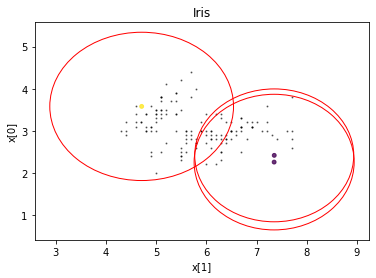

In [14]:
w = fuzz._get_layer_weights('FuzzyRules')


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], c=(0,0,0), alpha=0.5,s=1)
for i in range(0,fuzz.neurons):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='r', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], c=(1,0,0), alpha=0.8,s=15)
plt.show()